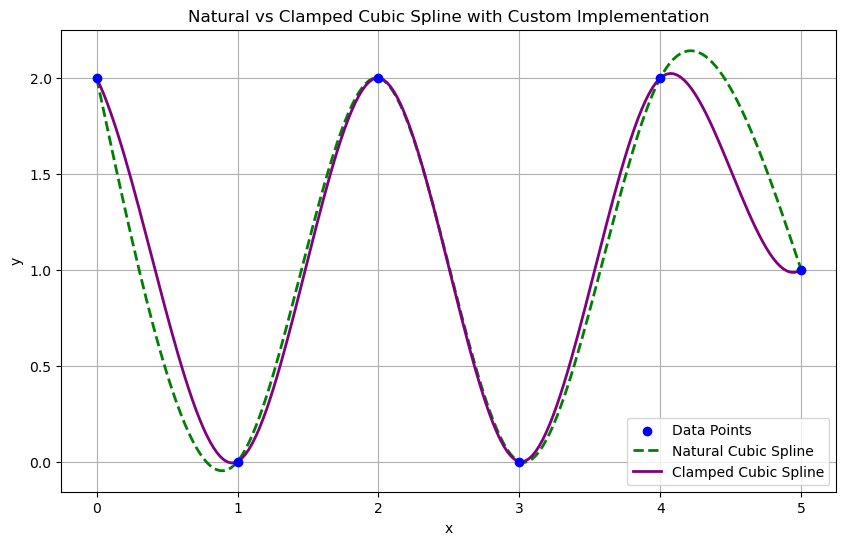

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def cubic_spline_coefficients(x, y, bc_type='natural', slope_start=None, slope_end=None):
    n = len(x) - 1  
    h = np.diff(x)  
    b = np.diff(y) / h  
    A = np.zeros((n+1, n+1))
    d = np.zeros(n+1)

    if bc_type == 'natural':
        A[0, 0] = 1
        A[-1, -1] = 1
    elif bc_type == 'clamped':
        A[0, 0] = 2 * h[0]
        A[0, 1] = h[0]
        d[0] = 3 * (b[0] - slope_start)

        A[-1, -2] = h[-1]
        A[-1, -1] = 2 * h[-1]
        d[-1] = 3 * (slope_end - b[-1])

    for i in range(1, n):
        A[i, i-1] = h[i-1]
        A[i, i] = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]
        d[i] = 3 * (b[i] - b[i-1])

    c = np.linalg.solve(A, d)

    b = np.zeros(n)
    d = np.zeros(n)
    for i in range(n):
        b[i] = (y[i+1] - y[i]) / h[i] - h[i] * (c[i+1] + 2*c[i]) / 3
        d[i] = (c[i+1] - c[i]) / (3 * h[i])

    return y[:-1], b, c[:-1], d

def cubic_spline_evaluate(x, y, coeffs, x_eval):
    a, b, c, d = coeffs
    n = len(a)
    y_eval = np.zeros_like(x_eval)
    
    for i in range(n):
        mask = (x_eval >= x[i]) & (x_eval <= x[i+1])
        dx = x_eval[mask] - x[i]
        y_eval[mask] = a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3

    return y_eval

#Data points
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([2, 0, 2, 0, 2, 1])

# Natural cubic spline
natural_coeffs = cubic_spline_coefficients(x, y, bc_type='natural')

# Clamped cubic spline (with specified boundary slopes)
clamped_coeffs = cubic_spline_coefficients(x, y, bc_type='clamped', slope_start=-1.5, slope_end=0.5)

# Points to evaluate the spline
x_fine = np.linspace(0, 5, 200)

y_natural = cubic_spline_evaluate(x, y, natural_coeffs, x_fine)
y_clamped = cubic_spline_evaluate(x, y, clamped_coeffs, x_fine)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points', zorder=5)
plt.plot(x_fine, y_natural, color='green', linestyle='--', linewidth=2, label='Natural Cubic Spline')
plt.plot(x_fine, y_clamped, color='purple', linestyle='-', linewidth=2, label='Clamped Cubic Spline')

plt.legend()
plt.title("Natural vs Clamped Cubic Spline with Custom Implementation")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()
